<a href="https://colab.research.google.com/github/Terry-Migwi/Moringa_Datascience_Core_Week_6_IP/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_07_Terry_Migwi_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question


### Specifying the question

As the football analyst of Mchezopesa limited, I have a task to predict the results of a football match between two teams i.e the home team or the away team.

The results should include the number of goals scored by each team and the difference between the scores from both teams i.e 
1.   How many goals will the home team score?
2.   How many goals will the away team score?
3.   Which of the two teams will be the winning team?



### Defining the Metrics for success

1. Determine what to train given the rank of the home teams, rank of the away teams and the type of match/tournament 
2. Predicting the scores for the teams given the correct training data using a polynomial model
3. Determine the home team's perspective i.e is it a win, draw or a loss using logistic regression

### Understanding the context

Mchezopesa limited is a sports analytics company that helps fans analyze and predict individual athletes and team performance. Mchezopesa uses real-time daily and historial data to perform predictive modelling algorithms that they use to make projections that are used by fantasy sports fans. By far, football is the most popular fantasy sport contributing to 36% of the indusry revenue hence mchezopesa focusses on football. The main objective of mchezopesa is to make accurate projections that will optimize winning chances of fantasy sports players hence attracting new players and maintaing existing players.

Mchezopesa users focus on three factors i.e the home team, the away team and the type of tournament. i.e either the home team will win or the away team will win based on the type of match they have selected.As the football analyst of mchezopesa, I have a task to ensure the players make winning moves by making the most accurate predictions based on the data available.

### Recording the experimental design

The following are the steps to take during this study:
1.   Importing necessary dependencies and libraries
2.   Loading datasets and investigating important features of the data
3.   Merging the datasets
4.   Performing EDA 
5.   Feature Engineering
6.   Obtaining appropriate training and test sets 
7.   Fitting appropriate models to the sets
8.   Evaluating the models i.e cross-validation, multi-collinearity hyperparameter tuning



### Data Relevance

The data provided for this study consists of two datasets i.e fifa rankings and results datasets in csv files. Both datasets contain details of football teams, scores, tournaments, countries, rankings and units used to do the rankings. As both datasets are equally important for the analyis, we will be required to merge them into one so we can utilize them both. 

##2. Reading the data

In [ ]:
#importing our dependencies

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style()


### Loading Datasets

In [ ]:
ranking = pd.read_csv("/content/fifa_ranking.csv")

# previewing the top part of the data
ranking.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
# previewing the bottom of the data

ranking.tail(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
13991,104,Vietnam,VIE,0.0,393.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2000-08-09
13992,105,Mozambique,MOZ,0.0,373.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2000-08-09
13993,106,Uganda,UGA,0.0,355.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2000-08-09
13994,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ranking.nunique()

rank                       202
country_full               204
country_abrv               204
total_points                 1
previous_points            772
rank_change                 88
cur_year_avg                 1
cur_year_avg_weighted        1
last_year_avg                1
last_year_avg_weighted       1
two_year_ago_avg             1
two_year_ago_weighted        1
three_year_ago_avg           1
three_year_ago_weighted      1
confederation                6
rank_date                   75
dtype: int64

In [ ]:
#exploring columns in the rankings dataset

ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
#finding the size of the ranking dataset

ranking.shape

(13995, 16)

We have a total of 57,793 records and 16 columns in the dataset

In [ ]:
#checking datatypes for the columns

ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

All the columns seem to be of appropriate datatypes except for the rank date which is an object but a more appropriate datatype is datetime

In [ ]:
#converting rank date to datetime data type

ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [ ]:
# loading the results dataset

results = pd.read_csv("/content/results.csv", encoding = 'latin1')
results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [ ]:
# previewing the bottom part of the dataset

results.tail(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
14577,1987-07-18,Sudan,Cameroon,1,0,African Cup of Nations qualification,Khartoum,Sudan,False
14578,1987-07-19,DR Congo,Senegal,0,0,African Cup of Nations qualification,Kinshasa,ZaÃ¯re,False
14579,1987-07-19,Ivory Coast,Malawi,2,0,African Cup of Nations qualification,Abidjan,Ivory Coast,False
14580,1987-07-25,SÃ£o TomÃ© and PrÃ­ncipe,Guinea-Bissau,0,2,Friendly,SÃ£o TomÃ©,SÃ,NaN


In [ ]:
# checking into the columns in the dataset

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# checking the size of the dataset

results.shape

(14581, 9)

In [ ]:
# checking unique values of the dataset

results.nunique()

date          8392
home_team      210
away_team      212
home_score      19
away_score      19
tournament      61
city           794
country        214
neutral          2
dtype: int64

In [ ]:
# exploring datatypes of the different columns 

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral       object
dtype: object

In [ ]:
#converting date column to datetime data type

results['date'] = pd.to_datetime(results['date'])


In [ ]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral               object
dtype: object

### Merging the Datasets

In [ ]:
#rename country in the ranking dataset to avoid duplicats

ranking = ranking.rename(columns = {"country_full" : "country"})

In [ ]:
# merging the main dataset
football = results.merge(ranking, left_on = ['date', 'home_team'],
                          right_on = ['rank_date', 'country'])
football = results.merge(ranking, left_on = ['date', 'away_team'],
                          right_on = ['rank_date', 'country'], suffixes =('_home', '_away_'))
football.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_home,neutral,rank,country_away_,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date


In [ ]:
#merging the two datasets on home team to obtain a dataset of home team countries with their rankings

home_team = results.merge(ranking, left_on = ['date', 'home_team'],
                          right_on = ['rank_date', 'country'])
home_team.head(3)

#renaming the rank and rank change columns to home team rank columns 

home_team = home_team.rename(columns = ({'rank' : 'home_team_rank', 'rank_change' : 'home_rank_change'}))
home_team.head(4)

In [ ]:
#merging the two datasets on away team to obtain a dataset of away team countries with their rankings

away_team = results.merge(ranking, left_on = ['date', 'away_team'],
                          right_on = ['rank_date', 'country'], suffixes =('_home', '_away_'))
away_team.tail(4)

#renaming rank to away team rank

away_team = away_team.rename(columns = {'rank' : 'away_team_rank', 'rank_change' : 'away_rank_change'})
away_team.head(4)

In [ ]:
# adding home team rank, home team rank change, away team rank and away team rank change to the football dataframe
football['home_team_rank'] = home_team['home_team_rank']
football['away_team_rank'] = away_team['away_team_rank']
football['home_team_rank_change'] = home_team['home_rank_change']
football['away_team_rank_change'] = away_team['away_rank_change']


football.head(2)

##3. Checking the data

In [ ]:
# splitting the rank date column to year, month and date

football[['yy','mm','dd']] = football['rank_date'].astype(str).str.split('-', expand=True).astype(int)

#checking the datatypes to ensure changes have been made
football.dtypes

Some columns have the same details, some have been repeated while others are irrelevant to our study hence the need to drop these columns 

In [ ]:
#checking our columns 

football.columns

In [ ]:
# dropping irrelevent columns from the football dataset

# football.drop(['date', 'city', 'country_home', 'rank', 'country_away_', 'country_abrv', 'rank_change', 'rank_date', 'mm', 'dd'], axis = 1, inplace = True)

In [ ]:
# confirming we only have relevent columns in our dataset

football.columns

All the columns required for this study are present. However, we might need to drop some of the columns and also add more 

In [ ]:
#checking the size of our newly obtained dataset

football.shape


The new dataset has 933 records and 22 columns

In [ ]:
#obtaining more information about the dataset
football.info()

The data has a total of 933 records of non-null values

In [ ]:
# checking for duplicates in the dataset

football[football.duplicated()]

There are no records that have duplicates in our dataset

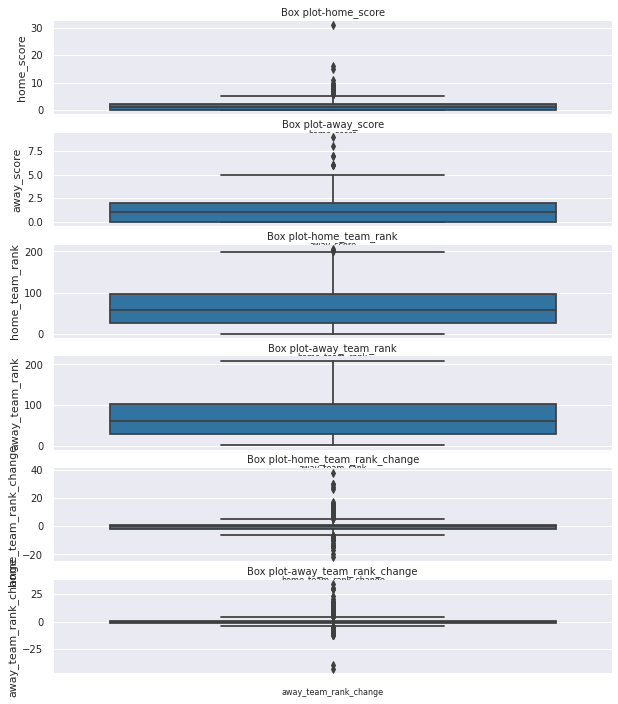

In [ ]:
# checking for outliers in the home scores, away scores and the ranking columns
# creating a list of columns of interest

columns = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank', 'home_team_rank_change', 'away_team_rank_change']


fig, ax = plt.subplots(len(columns), figsize = (10, 12))

for i, col_val in enumerate(columns):

  sb.boxplot(y= football[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()



In the home score column, most of the observations lie above the 5 mark but below the 20 mark. There is also an observed value at the 31st mark. This could be a true observation hence we will not remove it. In the away score column, the points are distributed evenly above 5 but below 10, there is no value that is observed as an anomaly.

The home team rank column has an outlier around the 200 mark while there are no outliers in the away team rank column.

In the home team rank change column, we observe quite a number of observations above and below the interquartile range as well as in the away team rank change columns. This could mean the changes in ranks are highly inconsistent.

##4. External Datasource Validation

##5. Exploratory Data Analysis

### Univariate Analysis

In [ ]:
football.describe()

,home_score,away_score,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,1.648446,1.004287,30.426195,443.767417,15.040525,15.040525,15.260772,7.630386,15.712326,4.713687,15.208317,3.041651,66.025723,70.445874,-0.061093,0.148982
std,1.951309,1.167323,132.837821,313.218600,69.138288,69.138288,68.302697,34.151370,72.227343,21.668130,68.680010,13.736013,47.557006,50.450593,4.409013,4.818630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-22.000000,-43.000000
25%,0.000000,0.000000,0.000000,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,29.000000,-2.000000,-1.000000
50%,1.000000,1.000000,0.000000,452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,61.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,103.000000,1.000000,1.000000
max,31.000000,9.000000,1181.430000,1883.000000,817.580000,817.580000,617.620000,308.810000,637.290000,191.190000,665.550000,133.110000,206.000000,209.000000,38.000000,34.000000


###Measures of Central Tendency

In [ ]:
# creating a list of scores and ranks of the teams
columns = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank', 'home_team_rank_change', 'away_team_rank_change']

#Obtaining the mean of the columns mentioned

for column in columns:
  print('\n')
  print(column +':' + str(football[column].mean()))



home_score:1.6484458735262595


away_score:1.0042872454448017


home_team_rank:66.02572347266882


away_team_rank:70.44587352625938


home_team_rank_change:-0.06109324758842444


away_team_rank_change:0.1489817792068596


Both home scores and away scores have a mean range of 1 but home score has a higher mean by 0.5. 

The mean values of the away team rank is higher than the mean value of the home team rank. Hence the away teams have recorded higher chances of higher rankings.

The home team rank change has a negative mean value. This could mean most home teams rank lower per match.

In [ ]:
#Obtaining the mode of the columns mentioned

for column in columns:
  print('\n')
  print(column +':' + str(football[column].mode()))



home_score:0    1
dtype: int64


away_score:0    0
dtype: int64


home_team_rank:0    33
dtype: int64


away_team_rank:0    36
dtype: int64


home_team_rank_change:0    0
dtype: int64


away_team_rank_change:0    0
dtype: int64


Most home scores recorded are 1's as compared to most away scores recorded that are 0's. 

Most home teams are ranked at 33 while most away teams are ranked at 36, hence more away scores have a higher ranking as compared to the home teams

### Measures of Dispersion

In [ ]:
for column in columns:
  print('\n')
  print(column + ', variance: ' +str(football[column].var()))
  print(column + ', std_deviation: ' +str(football[column].std()))
  print(column + ', skewness: ' +str(football[column].skew()))
  print(column + ', kurtosis: ' +str(football[column].kurt()))



home_score, variance: 3.8076075606400894
home_score, std_deviation: 1.9513091914507268
home_score, skewness: 5.276778075359087
home_score, kurtosis: 60.985748604004904


away_score, variance: 1.3626425440109746
away_score, std_deviation: 1.1673228105417004
away_score, skewness: 1.8330710075212275
away_score, kurtosis: 5.839401828995081


home_team_rank, variance: 2261.668865489972
home_team_rank, std_deviation: 47.55700648158978
home_team_rank, skewness: 0.7211541914994738
home_team_rank, kurtosis: -0.21116227568788837


away_team_rank, variance: 2545.2623568809854
away_team_rank, std_deviation: 50.45059322625439
away_team_rank, skewness: 0.6728937288778412
away_team_rank, kurtosis: -0.35497011685628177


home_team_rank_change, variance: 19.439396657604604
home_team_rank_change, std_deviation: 4.409013116061757
home_team_rank_change, skewness: 1.853762156325902
home_team_rank_change, kurtosis: 15.606619870784572


away_team_rank_change, variance: 23.219196923487434
away_team_rank_cha

###Histograms

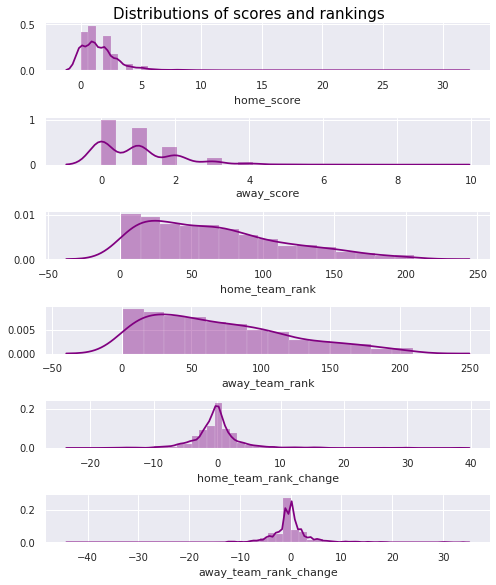

In [ ]:
# histograms of our columns of interest

sb.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of scores and rankings', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), football, columns):
  sb.distplot(football[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

### Bar Charts

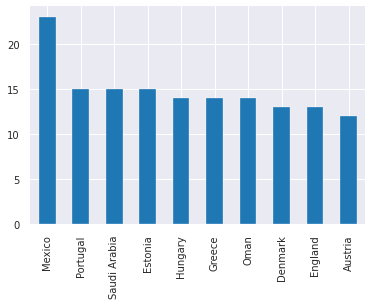

In [ ]:
# creating a list of all categorical columns for exploration

categorical_columns = ['home_team', 'away_team', 'tournament', 'neutral','confederation']

football['home_team'].value_counts().head(10).plot.bar()


In [ ]:
# frequency distribution

football['home_team'].value_counts()

Mexico              23
Portugal            15
Saudi Arabia        15
Estonia             15
Hungary             14
                    ..
Liberia              1
Papua New Guinea     1
Samoa                1
Afghanistan          1
Macau                1
Name: home_team, Length: 175, dtype: int64

Mexico has the most records of home teams i.e most of the matches were played in Mexico, followed by Portugal, Saudi Arabia and Estonia whereas Liberia, Papua New Guinea, Samoa, Afghanistan and Macau have the least records of home teams

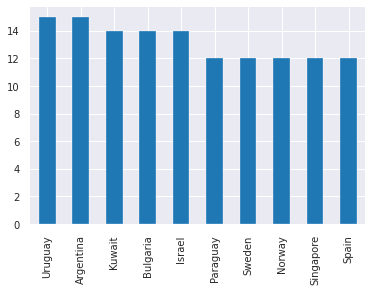

In [ ]:
# bar graph of away teams

football['away_team'].value_counts().head(10).plot.bar()


In [ ]:
# frequency distrbution of the away team

football['away_team'].value_counts()

Uruguay            15
Argentina          15
Kuwait             14
Bulgaria           14
Israel             14
                   ..
Sierra Leone        1
Chad                1
Nepal               1
San Marino          1
Solomon Islands     1
Name: away_team, Length: 164, dtype: int64

There are a total of 175 away teams with Uruguay and Argentina being the most records of 15 and Sierra Leone, Chad, Nepal, San Marino and Solomon Islands with the least records of 1.

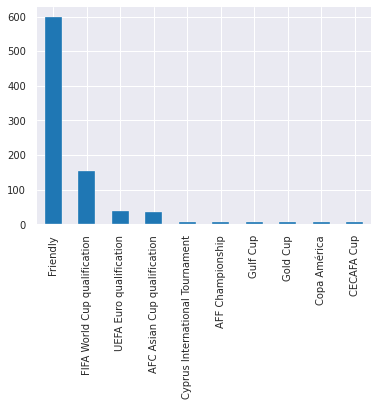

In [ ]:
# bar graphs of the types of tournaments played

football['tournament'].value_counts().head(10).plot.bar()

In [ ]:
# frequency distribution of tournaments

football['tournament'].value_counts()

Friendly                                      598
FIFA World Cup qualification                  155
UEFA Euro qualification                        39
AFC Asian Cup qualification                    36
Cyprus International Tournament                 8
AFF Championship                                8
Gulf Cup                                        7
Gold Cup                                        6
Copa América                                    6
CECAFA Cup                                      6
CFU Caribbean Cup qualification                 5
African Cup of Nations qualification            5
African Nations Championship                    4
SAFF Cup                                        4
African Cup of Nations                          4
AFC Asian Cup                                   4
Gold Cup qualification                          3
King's Cup                                      3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3


The total number of tournaments recorded is 109. The highest record is of 589 friendly matches followed by 155 matches of FIFA World Cup qualifications. There's a huge difference between the two most recorded types of tournaments, this means our data consisits of mostly friendly matches. Most of the other tournament types have significantly few records.

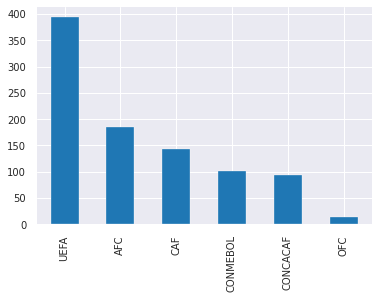

In [ ]:
# bar graph of conferedation

football['confederation'].value_counts().plot.bar()

The dataset has included a total of 6 confederations with UEFA recording the most number of matches followed by AFC which has recorded almost half of the matches from UEFA. OFC has recorded the least matches

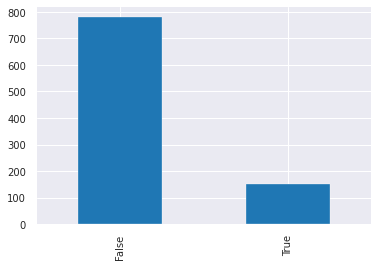

In [ ]:
# bar graphs of neutral

football['neutral'].value_counts().plot.bar()

The number of matches played at a neutral venue is relatively lower than the matches not played at a neutral venue.

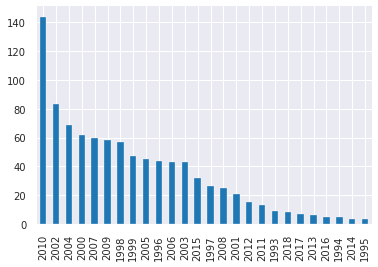

In [ ]:
# bar charts of years 
football['yy'].value_counts().plot.bar()

The year 2010 had the most matches played, around 140 matches. This could have been as a result of the world cup that happened during that year followed by 2002 with 85 matches, which was also an year the world cup was played. Following closely is 2004 with around 70 matches. 2014 and 1995 have recorded the least matches played.

<!-- rank dates -->

##6. Implementing the Solution

Expected flow for the assessment:

Perform your EDA

Perform any necessary feature engineering 

Check of multicollinearity

Start building the model

Cross-validate the model

Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

Perform appropriate regressions on the data including your justification

Challenge your solution by providing insights on how you can make improvements

### Feature Engineering

In [ ]:
# adding the status column to the dataset 
# creating a list of our conditions
conditions = [
              football['home_score'] > football['away_score'],
              football['home_score'] == football['away_score'],
              football['home_score'] < football['away_score']
]

# create a list of the values we want to assign for each 
values = ['Win', 'Draw', 'Loss']

# creating a new columnn and using np.select to assign values to it using our lists as attributes

football['status'] = np.select(conditions, values)

# previewing the column
football.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change,yy,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,0.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,59,22,28,-6,1993,Win
1,Brazil,Mexico,1,1,Friendly,False,0.0,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,8,14,-5,11,1993,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,35,94,30,31,1993,Win


In [ ]:
# dropping all columns that are not independent variables in the football dataset

independent = football.drop(columns = ['home_team', 'away_team', 'tournament', 'yy', 'confederation'])

NameError: ignored

In [ ]:
# exploring the status column 
football['status'].value_counts()

Win     451
Loss    243
Draw    239
Name: status, dtype: int64

The home team has experienced more wins than losses and draws and more losses than draws

### Checking for multicollinearity

###Polynomial Regression

###Logistic Regression

In [ ]:
# columns required for logistsic regression: home team, home team score, away team, away team score,
# year, home team rank, away team rank, tournament type, status(generate) - Win, Draw, loss

#create a list of conditions
conditions = [
              (results['home_score'] > results['away_score']),
              (results['home_score'] == results['away_score']),
              (results['home_score'] < results['away_score'])
]

#create a list of the values we want to assign for each condition
values = ['Win', 'Draw', 'Loss']

#create a new column and use np.select to assign values to it using our lists as arguments

results['status'] = np.select(conditions, values)

#previewing our column
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [ ]:
results.tail(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,Draw
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,Loss
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,Loss
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,Draw


In [ ]:
#finding unique values 
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
status            3
dtype: int64

In [ ]:
#visualizing our target variable